# Предобработка

#### Важное замечание: в датасете собраны в том числе ответы на опросники про коленный и тазобедренный сустав, поэтому данные пациентов, которые не проходили один из опросов, будут заполнены пропусками, из-за чего может показаться, что датасет пустой


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn import preprocessing
import random

random.seed(42)

In [2]:
df = pd.read_csv("data.csv")
df.head()

,pers_age,pers_sex,sch_edu,non_sch_edu,bmi,proc,joint,side,pjr_diag,pjr_diag_oth,...,compl_mth6_nodm_spec___17,compl_mth6_nodm_spec___18,compl_mth6_nodm_spec___19,compl_mth6_nodm_spec___20,compl_mth6_nodm_spec___89,compl_mth6_nodm_spec___999,q1_exp_pain,q1_exp_function,mth6_satisf,mth6_success
0,60,1.0,3.0,6.0,10.0,1,1,1.0,1.0,NaN,...,0,0,0,0,0,0,4.0,4.0,999.0,999.0
1,72,1.0,3.0,6.0,26.6,1,2,1.0,1.0,NaN,...,0,0,0,0,0,0,3.0,4.0,2.0,3.0
2,64,1.0,3.0,1.0,30.1,1,2,3.0,1.0,NaN,...,0,0,0,0,0,0,4.0,4.0,3.0,4.0
3,72,1.0,4.0,1.0,33.2,4,1,999.0,NaN,NaN,...,0,0,0,0,0,0,999.0,999.0,3.0,4.0
4,70,1.0,4.0,1.0,23.1,1,2,2.0,1.0,NaN,...,0,0,0,0,0,0,3.0,4.0,3.0,4.0


In [3]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 227)


#### Заменим 999 на пропуски

In [4]:
num_replace = {999: np.nan}

df = df.replace(num_replace)

df.head()

,pers_age,pers_sex,sch_edu,non_sch_edu,bmi,proc,joint,side,pjr_diag,pjr_diag_oth,...,compl_mth6_nodm_spec___17,compl_mth6_nodm_spec___18,compl_mth6_nodm_spec___19,compl_mth6_nodm_spec___20,compl_mth6_nodm_spec___89,compl_mth6_nodm_spec___999,q1_exp_pain,q1_exp_function,mth6_satisf,mth6_success
0,60,1.0,3.0,6.0,10.0,1.0,1,1.0,1.0,NaN,...,0,0,0,0,0,0,4.0,4.0,NaN,NaN
1,72,1.0,3.0,6.0,26.6,1.0,2,1.0,1.0,NaN,...,0,0,0,0,0,0,3.0,4.0,2.0,3.0
2,64,1.0,3.0,1.0,30.1,1.0,2,3.0,1.0,NaN,...,0,0,0,0,0,0,4.0,4.0,3.0,4.0
3,72,1.0,4.0,1.0,33.2,4.0,1,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,3.0,4.0
4,70,1.0,4.0,1.0,23.1,1.0,2,2.0,1.0,NaN,...,0,0,0,0,0,0,3.0,4.0,3.0,4.0


#### Удалим строки, где целевые оценки не входят в числовой диапозон, заданный в dictionary

In [5]:
df = df.drop(df[df['q1_eq5d_vas'] < 0].index)
df = df.drop(df[df['q1_eq5d_vas'] > 100].index)

df = df.drop(df[df['q1_oxf_hs_total'] < 0].index)
df = df.drop(df[df['q1_oxf_hs_total'] > 48].index)
df = df.drop(df[df['mth6_oxf_hs_total'] < 0].index)
df = df.drop(df[df['mth6_oxf_hs_total'] > 48].index)

df = df.drop(df[df['q1_oxf_ks_total'] < 0].index)
df = df.drop(df[df['q1_oxf_ks_total'] > 48].index)
df = df.drop(df[df['mth6_oxf_ks_total'] < 0].index)
df = df.drop(df[df['mth6_oxf_ks_total'] > 48].index)

In [6]:
df.dtypes

pers_age                        int64
pers_sex                      float64
sch_edu                       float64
non_sch_edu                   float64
bmi                           float64
                               ...   
compl_mth6_nodm_spec___999      int64
q1_exp_pain                   float64
q1_exp_function               float64
mth6_satisf                   float64
mth6_success                  float64
Length: 227, dtype: object

In [7]:
df.shape

(7551, 227)

## Пропуски

In [8]:
for column in df:
    print(column, df[column].isnull().sum())

pers_age 0
pers_sex 1
sch_edu 249
non_sch_edu 444
bmi 7
proc 1
joint 0
side 4
pjr_diag 316
pjr_diag_oth 7467
rjr_diag 7326
rjr_diag_oth 7487
tjr_any 201
kr_prev 5306
kr_prev_side 5996
hr_prev 5345
hr_prev_side 6688
cc_lbp 294
cc_ii_arth 317
cc_hd 73
cc_hd_meds 4922
cc_hbp 169
cc_hbp_meds 3340
cc_diab 65
cc_diab_meds 6091
cc_sd 69
cc_sd_meds 6069
cc_lud 63
cc_lud_meds 6433
cc_rf 70
cc_rf_meds 7163
cc_livd 67
cc_livd_meds 7397
cc_nc 72
cc_nc_meds 7186
cc_dep 152
cc_dep_meds 6231
q1_eq5d_mobility 200
q1_eq5d_mobility_tas 7474
q1_eq5d_persol_care 198
q1_eq5d_persol_care_tas 7474
q1_eq5d_usual_activities 198
q1_eq5d_usual_activities_tas 7474
q1_eq5d_discomfort 197
q1_eq5d_discomfort_tas 7474
q1_eq5d_anxiety 214
q1_eq5d_anxiety_tas 7474
q1_eq5d_vas 190
q1_oxf_hs_pain 5081
q1_oxf_hs_washing 5081
q1_oxf_hs_transport 5080
q1_oxf_hs_dressing 5081
q1_oxf_hs_shopping 5080
q1_oxf_hs_walking 5080
q1_oxf_hs_stairs 5080
q1_oxf_hs_standing 5080
q1_oxf_hs_limping 5080
q1_oxf_hs_sudden_pain 5081
q1_oxf_h

## Столбцы демография

In [9]:
df.iloc[0:5, 0:5]

,pers_age,pers_sex,sch_edu,non_sch_edu,bmi
1,72,1.0,3.0,6.0,26.6
2,64,1.0,3.0,1.0,30.1
3,72,1.0,4.0,1.0,33.2
4,70,1.0,4.0,1.0,23.1
5,84,2.0,4.0,6.0,26.4


<li>pers_age - возраст
<li>pers_sex - гендер (1 - male, 2 - female)
<li>sch_edu  - (1 - year 12, 2 - year 11, 3 - year 10, 4 - year 9, 5 - year 8 or below, 6 - no schooling)
<li>non_sch_edu - высший уровень невшкольного образования (от 1 до 6)
<li>bmi - индекс тела, расчитывающийся исходя из роста и массы тела человека

In [10]:
df_demo = df.iloc[:, 0:5]

## Базовые медицинские характеристики

In [11]:
df.iloc[0:10, 6:37]

,joint,side,pjr_diag,pjr_diag_oth,rjr_diag,rjr_diag_oth,tjr_any,kr_prev,kr_prev_side,hr_prev,...,cc_lud,cc_lud_meds,cc_rf,cc_rf_meds,cc_livd,cc_livd_meds,cc_nc,cc_nc_meds,cc_dep,cc_dep_meds
1,2,1.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
2,2,3.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
3,1,NaN,NaN,NaN,1.0,NaN,1.0,2.0,NaN,1.0,...,1.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,2.0,NaN
4,2,2.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,2.0,NaN,1.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN
5,2,2.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
6,2,1.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN
7,2,1.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,2.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,2.0,NaN
8,1,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
9,1,2.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN
10,1,2.0,5.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN


<li>proc - операция
<li>joint - часть тела (1 - тазобедренный сустав, 2 - коленный)
<li>side - сторона заменяемого сустава
<li>pjr_diag - диагноз, определен только, если join 1 или 2 или 3 (в основном остеаортрит)
<li>pjr_diag_oth - другой диагноз
<li>tjr_any - проводилась ли другая операция по замене сустава
<li>kr_prev - проводилась ли операция по замене коленного сустава
<li>kr_prev_side - сторона заменяемого коленного сустава
<li>hr - тоже самое с тазобедренным суставом
<li>cc - медицинские характеристики 

In [12]:
df_base = df.iloc[:, 6:37]

In [13]:
df_base.shape

(7551, 31)

In [14]:
df_base.isnull().sum()

joint              0
side               4
pjr_diag         316
pjr_diag_oth    7467
rjr_diag        7326
rjr_diag_oth    7487
tjr_any          201
kr_prev         5306
kr_prev_side    5996
hr_prev         5345
hr_prev_side    6688
cc_lbp           294
cc_ii_arth       317
cc_hd             73
cc_hd_meds      4922
cc_hbp           169
cc_hbp_meds     3340
cc_diab           65
cc_diab_meds    6091
cc_sd             69
cc_sd_meds      6069
cc_lud            63
cc_lud_meds     6433
cc_rf             70
cc_rf_meds      7163
cc_livd           67
cc_livd_meds    7397
cc_nc             72
cc_nc_meds      7186
cc_dep           152
cc_dep_meds     6231
dtype: int64

#### Значения ячеек некоторых столбцов зависят от ячеек других признаков, но они в основном заполнены пропусками. Их решено удалить

In [15]:
df_base = df_base.drop(columns = ['pjr_diag_oth', 'rjr_diag', 'rjr_diag_oth', 'cc_nc_meds', 'cc_livd_meds', 'cc_rf_meds'])

In [16]:
df_base.isnull().sum()

joint              0
side               4
pjr_diag         316
tjr_any          201
kr_prev         5306
kr_prev_side    5996
hr_prev         5345
hr_prev_side    6688
cc_lbp           294
cc_ii_arth       317
cc_hd             73
cc_hd_meds      4922
cc_hbp           169
cc_hbp_meds     3340
cc_diab           65
cc_diab_meds    6091
cc_sd             69
cc_sd_meds      6069
cc_lud            63
cc_lud_meds     6433
cc_rf             70
cc_livd           67
cc_nc             72
cc_dep           152
cc_dep_meds     6231
dtype: int64

Заполним пропуски нулям

In [17]:
df_base = df_base.fillna(0)
df_base.isnull().sum()

joint           0
side            0
pjr_diag        0
tjr_any         0
kr_prev         0
kr_prev_side    0
hr_prev         0
hr_prev_side    0
cc_lbp          0
cc_ii_arth      0
cc_hd           0
cc_hd_meds      0
cc_hbp          0
cc_hbp_meds     0
cc_diab         0
cc_diab_meds    0
cc_sd           0
cc_sd_meds      0
cc_lud          0
cc_lud_meds     0
cc_rf           0
cc_livd         0
cc_nc           0
cc_dep          0
cc_dep_meds     0
dtype: int64

#### Объединим столбцы демографии с базовыми медицинскими характеристиками

In [18]:
df_base = df_demo.join(df_base)
df_base.shape

(7551, 30)

# Proms - стандартизированные, проверенные опросы

## EQ-5D - универсальный опрос

In [19]:
df.iloc[0:5, 38:48]

,q1_eq5d_mobility_tas,q1_eq5d_persol_care,q1_eq5d_persol_care_tas,q1_eq5d_usual_activities,q1_eq5d_usual_activities_tas,q1_eq5d_discomfort,q1_eq5d_discomfort_tas,q1_eq5d_anxiety,q1_eq5d_anxiety_tas,q1_eq5d_vas
1,6.0,NaN,6.0,NaN,8.0,NaN,7.0,NaN,6.0,90.0
2,7.0,NaN,6.0,NaN,8.0,NaN,8.0,NaN,6.0,75.0
3,7.0,NaN,7.0,NaN,6.0,NaN,7.0,NaN,7.0,60.0
4,7.0,NaN,6.0,NaN,6.0,NaN,7.0,NaN,7.0,70.0
5,7.0,NaN,6.0,NaN,6.0,NaN,8.0,NaN,6.0,80.0


#### _tas - в справочнике указано, что значения указаны для hosp = '9' или hosp = '12', но в данных отсутствует (как и в справочнике) упоминание о нем, поэтому столбцы c _tas решено удалить

In [20]:
df.iloc[:, 38:48].isnull().sum()

q1_eq5d_mobility_tas            7474
q1_eq5d_persol_care              198
q1_eq5d_persol_care_tas         7474
q1_eq5d_usual_activities         198
q1_eq5d_usual_activities_tas    7474
q1_eq5d_discomfort               197
q1_eq5d_discomfort_tas          7474
q1_eq5d_anxiety                  214
q1_eq5d_anxiety_tas             7474
q1_eq5d_vas                      190
dtype: int64

In [21]:
df_eq5d = df.drop(columns = ['q1_eq5d_mobility_tas', 'q1_eq5d_persol_care_tas', 'q1_eq5d_usual_activities_tas', 'q1_eq5d_discomfort_tas', 'q1_eq5d_anxiety_tas'])
df_eq5d = df_eq5d.iloc[:, 38:43]

df_base = df_base.join(df_eq5d)
df_base.shape

(7551, 35)

## OHS - оксфордская шкала оценки результата для тазобедренного сустава

In [22]:
df.iloc[0:5, 49:61]

,q1_oxf_hs_washing,q1_oxf_hs_transport,q1_oxf_hs_dressing,q1_oxf_hs_shopping,q1_oxf_hs_walking,q1_oxf_hs_stairs,q1_oxf_hs_standing,q1_oxf_hs_limping,q1_oxf_hs_sudden_pain,q1_oxf_hs_work,q1_oxf_hs_night_pain,q1_oxf_hs_total
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2.0,3.0,2.0,3.0,2.0,3.0,1.0,1.0,2.0,2.0,25.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_ohs = df_base.join(df.iloc[:, 49:60])

In [24]:
df_ohs['mcid'] = df['mth6_oxf_hs_total'] - df['q1_oxf_hs_total']

df_ohs.loc[(df_ohs.mcid < 17), 'mcid'] = 7
# df_ohs.loc[(df_ohs.mcid >= 21.99), 'mcid'] = 8
df_ohs.loc[(df_ohs.mcid >= 17), 'mcid'] = 8

In [25]:
df_ohs['mcid'].value_counts()

8.0    2066
7.0     401
Name: mcid, dtype: int64

#### dropna() в этом случае нужен для того, чтобы отсеить людей, которые не отвечали на анкету OHS

In [26]:
df_ohs = df_ohs.dropna()
df_ohs.shape

(2203, 47)

In [27]:
df_ohs['mcid'].value_counts()

8.0    1854
7.0     349
Name: mcid, dtype: int64

In [28]:
df_ohs = df_ohs.drop(columns = 'joint')

In [29]:
num_replace = {'mcid': {7: 0, 8: 1}}
df_ohs = df_ohs.replace(num_replace)

In [30]:
df_ohs['mcid'].value_counts()

1.0    1854
0.0     349
Name: mcid, dtype: int64

### OHS для левой стороны

In [31]:
df.iloc[0:5, 62:74]

,q1_bi_oxf_hs_washing,q1_bi_oxf_hs_transport,q1_bi_oxf_hs_dressing,q1_bi_oxf_hs_shopping,q1_bi_oxf_hs_walking,q1_bi_oxf_hs_stairs,q1_bi_oxf_hs_standing,q1_bi_oxf_hs_limping,q1_bi_oxf_hs_sudden_pain,q1_bi_oxf_hs_work,q1_bi_oxf_hs_night_pain,q1_bi_oxf_hs_total
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_bi_ohs = df_base.join(df.iloc[:, 62:74])
df_bi_ohs.shape

(7551, 47)

In [33]:
df_bi_ohs = df_bi_ohs.dropna()
df_bi_ohs.shape

(27, 47)

Слишком мало данных

## OKS - оксфордская шкала оценки результата для коленного сустава

In [34]:
df.iloc[0:5, 75:87]

,q1_oxf_ks_washing,q1_oxf_ks_transport,q1_oxf_ks_walking,q1_oxf_ks_standing,q1_oxf_ks_limping,q1_oxf_ks_kneeling,q1_oxf_ks_night_pain,q1_oxf_ks_work,q1_oxf_ks_conf,q1_oxf_ks_shopping,q1_oxf_ks_stairs,q1_oxf_ks_total
1,4.0,3.0,2.0,2.0,0.0,0.0,2.0,2.0,3.0,4.0,3.0,26.0
2,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,12.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,3.0,3.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,1.0,28.0
5,3.0,3.0,2.0,1.0,0.0,0.0,4.0,2.0,4.0,0.0,1.0,20.0


In [35]:
df_oks = df_base.join(df.iloc[:, 75:86])

In [36]:
df_oks['mcid'] = df['mth6_oxf_ks_total'] - df['q1_oxf_ks_total']

df_oks.loc[(df_oks.mcid < 9.22), 'mcid'] = 7
# df_oks.loc[(df_oks.mcid >= 18.64), 'mcid'] = 8
df_oks.loc[(df_oks.mcid >= 9.22), 'mcid'] = 8

### Ситуация аналогичная с OHS

In [37]:
df_oks = df_oks.dropna()

In [38]:
df_oks = df_oks.drop(columns = 'joint')

In [39]:
num_replace = {'mcid': {7: 0, 8: 1}}
df_oks = df_oks.replace(num_replace)

In [40]:
num_replace = {'mcid': {7: 0, 8: 1}}

In [41]:
df_oks.mcid.value_counts()

1.0    3797
0.0     707
Name: mcid, dtype: int64

In [42]:
df.shape

(7551, 227)

### OKS для левой стороны

In [43]:
df.iloc[0:5, 88:100]

,q1_bi_oxf_ks_washing,q1_bi_oxf_ks_transport,q1_bi_oxf_ks_walking,q1_bi_oxf_ks_standing,q1_bi_oxf_ks_limping,q1_bi_oxf_ks_kneeling,q1_bi_oxf_ks_night_pain,q1_bi_oxf_ks_work,q1_bi_oxf_ks_conf,q1_bi_oxf_ks_shopping,q1_bi_oxf_ks_stairs,q1_bi_oxf_ks_total
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,12.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_bi_oks = df_base.join(df.iloc[:, 88:100])
df_bi_oks.shape

(7551, 47)

In [45]:
df_bi_oks = df_bi_oks.dropna()
df_bi_oks.shape

(233, 47)

Слишком мало данных

# Нормализация данных

In [46]:
cdf = df_ohs
cdf = (cdf-cdf.min ())/(cdf.max ()-cdf.min ())
mcid = df_ohs['mcid']
df_ohs = cdf
# Не нормализуем столбец mcid
df_ohs['mcid'] = mcid

cdf = df_oks
cdf = (cdf-cdf.min ())/(cdf.max ()-cdf.min ())
mcid = df_oks['mcid']
df_oks = cdf
df_oks['mcid'] = mcid

## Итого получаем

In [47]:
df_ohs.shape

(2203, 46)

In [48]:
df_oks.shape

(4504, 46)

# Построение моделей

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold, cross_validate, KFold
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from statistics import mean
import scipy.stats as st
import random
import xgboost as xgb
import numpy as np
import optuna


import plotly.graph_objects as go

## TabNet и hyperTab

In [50]:
from pytorch_tabnet.tab_model import TabNetClassifier
from hypertab import HyperTabClassifier
import torch

path = 'ohs'
DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"

In [51]:
if path == 'oks':
    X = df_oks.loc[:, df_oks.columns != 'mcid']
    y = df_oks.loc[:, df_oks.columns == 'mcid']
elif path == 'ohs':
    X = df_ohs.loc[:, df_ohs.columns != 'mcid']
    y = df_ohs.loc[:, df_ohs.columns == 'mcid']

In [ ]:
auc = []
for num_epochs in range(1000, 9001, 2000):
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random.randint(1, 10000))
        tabNet = TabNetClassifier(verbose=0,seed=42)
        tabNet.fit(X_train = X_train.to_numpy().squeeze(), y_train = y_train.to_numpy().squeeze(), patience=0, max_epochs=num_epochs,
                eval_metric=['auc'])
        auc.append(roc_auc_score(y_test.to_numpy(), tabNet.predict(X_test.to_numpy())))
    print(f'epochs: {num_epochs}')
    print(f'array: {auc}')
    print(f'mean = {mean(auc)}')
    print()
    auc = []

In [ ]:
auc = []
for num_epochs in range(10, 91, 20):
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random.randint(1, 10000))
        hyperTab = HyperTabClassifier(device=DEVICE, test_nodes=60, epochs=num_epochs, hidden_dims=2)
        hyperTab.fit(X_train.to_numpy().squeeze(), y_train.to_numpy().squeeze())
        auc.append(roc_auc_score(y_test.to_numpy(), hyperTab.predict(X_test.to_numpy())))
    print(f'epochs: {num_epochs}')
    print(f'array: {auc}')
    print(f'mean = {mean(auc)}')
    print()
    auc = []

# Оставшиеся модели

In [52]:
common = 'appendices/'

In [53]:
path = 'ohs'
get_ready = True

## Разделить датасет на обучение и тюнинг

In [54]:
if not get_ready:
    if path == 'oks':
        elem_df = df_oks.copy()
    elif path == 'ohs':
        elem_df = df_ohs.copy()

    X = elem_df.loc[:, elem_df.columns != 'mcid']
    y = elem_df.loc[:, elem_df.columns == 'mcid']

    X, X_tuning, y, y_tuning = train_test_split(
            X, y, test_size=0.50, random_state=random.randint(1, 10000))

## Сохранить датасеты

In [55]:
if not get_ready:
    X['mcid'] = y
    X_tuning['mcid'] = y_tuning

    X.to_csv(r'tuning_training_csv/' + path + '/model_training.csv')
    X_tuning.to_csv(r'tuning_training_csv/' + path + '/tuning.csv')

    X = X.drop(columns=['mcid'])
    X_tuning = X_tuning.drop(columns=['mcid'])

## Подбор гиперпараметров

In [56]:
if not get_ready:    
    def logreg_objective(trial):
        c = trial.suggest_float('C', 1e-5, 1000, log=True)
        penalty = trial.suggest_categorical("penalty", ('l1', 'l2'))
        class_weight = {0: trial.suggest_float('class_weight', 1,20)}

        clf =  LogisticRegression(class_weight = class_weight, max_iter=5000, penalty='l1', solver='liblinear', C=c)

        auc = []
        random.seed(random.randint(1, 10000))
        for i in range(10):
            X_train, X_test, y_train, y_test = train_test_split(
                X_tuning, y_tuning, test_size=0.20, random_state=random.randint(1, 10000))

            clf.fit(X_train, y_train.values.ravel())
            auc.append(roc_auc_score(y_test, clf.predict(X_test)))

        return sum(auc)/len(auc)


    logreg_study = optuna.create_study(direction='maximize')
    logreg_study.optimize(logreg_objective, n_trials=100)

    def dt_objective(trial):
        md = trial.suggest_int('max_depth', 2, 100)
        mi = trial.suggest_int('min_samples_leaf', 1, 100)
        splitter = trial.suggest_categorical("splitter", ("best", "random"))
        min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
        max_features = trial.suggest_int('max_features', 1, 100)
        class_weight = {0: trial.suggest_float('class_weight', 1,20)}

        clf =  DecisionTreeClassifier(class_weight = class_weight, max_depth=md, min_samples_leaf=mi, splitter = splitter, random_state=1, min_samples_split = min_samples_split, max_features = max_features)
        auc = []
        random.seed(random.randint(1, 10000))
        for i in range(10):
            X_train, X_test, y_train, y_test = train_test_split(
                X_tuning, y_tuning, test_size=0.20, random_state=random.randint(1, 10000))

            clf.fit(X_train, y_train.values.ravel())
            auc.append(roc_auc_score(y_test, clf.predict(X_test)))

        return sum(auc)/len(auc)

    dt_study = optuna.create_study(direction='maximize')
    dt_study.optimize(dt_objective, n_trials=100)

    def knn_objective(trial):
        n_neighbors = trial.suggest_int('n_neighbors', 2, 32)
        leaf_size = trial.suggest_int('leaf_size', 1, 60)
        p = trial.suggest_int('p', 1, 2)

        clf =  KNeighborsClassifier(n_neighbors = n_neighbors, leaf_size = leaf_size, p = p)
        auc = []
        random.seed(random.randint(1, 10000))
        for i in range(10):
            X_train, X_test, y_train, y_test = train_test_split(
                X_tuning, y_tuning, test_size=0.20, random_state=random.randint(1, 10000))

            clf.fit(X_train, y_train.values.ravel())
            auc.append(roc_auc_score(y_test, clf.predict(X_test)))

        return sum(auc)/len(auc)

    knn_study = optuna.create_study(direction='maximize')
    knn_study.optimize(knn_objective, n_trials=100)

    def svc_objective(trial):
        C = trial.suggest_float('C', 1e-5, 100, log = True)
        gamma = trial.suggest_float('gamma', 1e-5, 100, log = True)
        kernel = trial.suggest_categorical("kernel", ('rbf', 'poly', 'sigmoid'))
        class_weight = {0: trial.suggest_float('class_weight', 1,20)}

        clf =  SVC(class_weight = class_weight, C = C, gamma = gamma, kernel = kernel)
        auc = []
        random.seed(random.randint(1, 10000))
        for i in range(10):
            X_train, X_test, y_train, y_test = train_test_split(
                X_tuning, y_tuning, test_size=0.20, random_state=random.randint(1, 10000))

            clf.fit(X_train, y_train.values.ravel())
            auc.append(roc_auc_score(y_test, clf.predict(X_test)))

        return sum(auc)/len(auc)

    svc_study = optuna.create_study(direction='maximize')
    svc_study.optimize(svc_objective, n_trials=100)

    def nb_objective(trial):
        alpha = trial.suggest_float('alpha', 0.001, 1, log=True)
        binarize = trial.suggest_float('binarize', 0.001, 1, log=True)
        fit_prior = trial.suggest_categorical("fit_prior", (True, False))

        clf = BernoulliNB(alpha = alpha, binarize = binarize, fit_prior = fit_prior)
        auc = []
        random.seed(random.randint(1, 10000))
        for i in range(10):
            X_train, X_test, y_train, y_test = train_test_split(
                X_tuning, y_tuning, test_size=0.20, random_state=random.randint(1, 10000))

            clf.fit(X_train, y_train.values.ravel())
            auc.append(roc_auc_score(y_test, clf.predict(X_test)))

        return sum(auc)/len(auc)

    nb_study = optuna.create_study(direction='maximize')
    nb_study.optimize(nb_objective, n_trials=100)

    def rt_objective(trial):
        n_estimators = trial.suggest_int('n_estimators', 25, 400)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        max_features = trial.suggest_int('max_features', 1, 30)
        bootstrap = trial.suggest_categorical("bootstrap", (True, False))
        max_leaf_nodes =  trial.suggest_int('max_leaf_nodes', 2, 20)
        criterion = trial.suggest_categorical("criterion", ('entropy', 'gini', 'log_loss'))
        class_weight = {0: trial.suggest_float('class_weight', 1,20)}

        clf = RandomForestClassifier(class_weight = class_weight, max_leaf_nodes = max_leaf_nodes, max_depth = max_depth, n_estimators = n_estimators, max_features = max_features, bootstrap = bootstrap, criterion = criterion)
        auc = []
        random.seed(random.randint(1, 10000))
        for i in range(10):
            X_train, X_test, y_train, y_test = train_test_split(
                X_tuning, y_tuning, test_size=0.20, random_state=random.randint(1, 10000))

            clf.fit(X_train, y_train.values.ravel())
            auc.append(roc_auc_score(y_test, clf.predict(X_test)))

        return sum(auc)/len(auc)

    rt_study = optuna.create_study(direction='maximize')
    rt_study.optimize(rt_objective, n_trials=100)

    def qda_objective(trial):
        reg_param = trial.suggest_int('reg_param', 0.01, 1)


        clf = QuadraticDiscriminantAnalysis(reg_param = reg_param)
        auc = []
        random.seed(random.randint(1, 10000))
        for i in range(10):
            X_train, X_test, y_train, y_test = train_test_split(
                X_tuning, y_tuning, test_size=0.20, random_state=random.randint(1, 10000))

            clf.fit(X_train, y_train.values.ravel())
            auc.append(roc_auc_score(y_test, clf.predict(X_test)))

        return sum(auc)/len(auc)

    qda_study = optuna.create_study(direction='maximize')
    qda_study.optimize(qda_objective, n_trials=100)

    def xgb_objective(trial):
        param = {
            "verbosity": 0,
            "objective": "binary:logistic",
            "eval_metric": "auc",
            "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
            "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
            "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
            # sampling ratio for training data.
            "subsample": trial.suggest_float("subsample", 0.2, 1.0),
            # sampling according to each tree.
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
            # class_weight заменился на scale_pos_weight, но в приложении старая версия
            "scale_pos_weight": trial.suggest_int("scale_pos_weight", 1, 20)
        }

        if param["booster"] == "gbtree" or param["booster"] == "dart":
            param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
            # minimum child weight, larger the term more conservative the tree.
            param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
            param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
            param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
            param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

        if param["booster"] == "dart":
            param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
            param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
            param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
            param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

        clf = xgb.XGBClassifier(**param)
        auc = []
        random.seed(random.randint(1, 10000))
        for i in range(10):
            X_train, X_test, y_train, y_test = train_test_split(
                X_tuning, y_tuning, test_size=0.20, random_state=random.randint(1, 10000))

            clf.fit(X_train, y_train.values.ravel())
            auc.append(roc_auc_score(y_test, clf.predict(X_test)))

        return sum(auc)/len(auc)

    xgb_study = optuna.create_study(direction='maximize')
    xgb_study.optimize(xgb_objective, n_trials=100)

    def nn_objective(trial):
        n_layers = trial.suggest_int('n_layers', 1, 2)
        momentum = trial.suggest_float("momentum", 0.0, 1)
        layers = []
        for i in range(n_layers):
            layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

        activation = trial.suggest_categorical('activation', ('tanh', 'relu'))
        solver = trial.suggest_categorical('solver', ('sgd', 'adam'))
        alpha = trial.suggest_float('alpha', 0.01, 1)
        learning_rate = trial.suggest_categorical('learning_rate', ('constant','adaptive'))
        power_t = trial.suggest_float("power_t", 0.2, 1, step=0.1)

        clf = MLPClassifier(momentum = momentum, power_t = power_t, solver = solver, alpha = alpha, activation = activation, learning_rate = learning_rate, hidden_layer_sizes=tuple(layers))
        auc = []
        random.seed(random.randint(1, 10000))
        for i in range(10):
            X_train, X_test, y_train, y_test = train_test_split(
                X_tuning, y_tuning, test_size=0.20, random_state=random.randint(1, 10000))

            clf.fit(X_train, y_train.values.ravel())
            auc.append(roc_auc_score(y_test, clf.predict(X_test)))

        return sum(auc)/len(auc)

    nn_study = optuna.create_study(direction='maximize')
    nn_study.optimize(nn_objective, n_trials=100)
    
# import torch
# from pytorch_tabnet.tab_model import TabNetClassifier

# def tabNet_objective(trial):
#     param = { 
#         'n_d': trial.suggest_int('n_d', 8, 64),
#         'n_a': trial.suggest_int('n_a', 8, 64),
#         'n_steps': trial.suggest_int('n_steps', 3, 10),
#         'gamma': trial.suggest_float('gamma', 1, 2),
#         'n_independent': trial.suggest_int('n_d', 1, 5),
#         'n_shared': trial.suggest_int('n_shared', 1, 5),
#         'momentum': trial.suggest_float('momentum', 0.01, 0.4),
#         'clip_value': trial.suggest_categorical('clip_value', (None, 2.)),
#         'optimizer_fn': torch.optim.Adam,
#         'optimizer_params': dict(lr=2e-2),
#         'scheduler_params': {"gamma": 0.95,
#                          "step_size": 20},
#         'scheduler_fn': torch.optim.lr_scheduler.StepLR
#     }

#     clf = TabNetClassifier(**param, verbose = 0)
#     auc = []
#     random.seed(random.randint(1, 10000))
#     for i in range(10):
#         X_train, X_test, y_train, y_test = train_test_split(
#             X_tuning, y_tuning, test_size=0.20, random_state=random.randint(1, 10000))

#         clf.fit(X_train.to_numpy().squeeze(), y_train.to_numpy().squeeze(), patience=0, max_epochs=1200,
#           eval_metric=['auc'])
#         auc.append(roc_auc_score(y_test.to_numpy(), clf.predict(X_test.to_numpy())))

#     return sum(auc)/len(auc)

# tabNet_study = optuna.create_study(direction='maximize')
# tabNet_study.optimize(tabNet_objective, n_trials=100)

## Сохранение результатов

In [57]:
if not get_ready:
    import pickle 
    from optuna.visualization import plot_optimization_history, plot_slice

    path_csv = common + 'study/' + path + '/csv/'
    logreg_study_df = logreg_study.trials_dataframe()
    logreg_study_df.to_csv(path_csv + 'logreg_study.csv')

    knn_study_df = knn_study.trials_dataframe()
    knn_study_df.to_csv(path_csv + 'knn_study.csv')

    nb_study_df = nb_study.trials_dataframe()
    nb_study_df.to_csv(path_csv + 'nb_study.csv')

    svc_study_df = svc_study.trials_dataframe()
    svc_study_df.to_csv(path_csv + 'svc_study.csv')

    dt_study_df = dt_study.trials_dataframe()
    dt_study_df.to_csv(path_csv + 'dt_study.csv')

    rt_study_df = rt_study.trials_dataframe()
    rt_study_df.to_csv(path_csv + 'rt_study.csv')

    qda_study_df = qda_study.trials_dataframe()
    qda_study_df.to_csv(path_csv + 'qda_study.csv')

    xgb_study_df = xgb_study.trials_dataframe()
    xgb_study_df.to_csv(path_csv + 'xgb_study.csv')

    nn_study_df = nn_study.trials_dataframe()
    nn_study_df.to_csv(path_csv + 'nn_study.csv')


    path_images = common + "study/" + path + "/images/"
    plot_slice(logreg_study).write_image(path_images + "logreg_study.png")
    plot_slice(knn_study).write_image(path_images + "knn_study.png")
    plot_slice(nb_study).write_image(path_images + "nb_study.png")
    plot_slice(svc_study).write_image(path_images + "svc_study.png")
    plot_slice(dt_study).write_image(path_images + "dt_study.png")
    plot_slice(rt_study).write_image(path_images + "rt_study.png")
    plot_slice(qda_study).write_image(path_images + "qda_study.png")
    plot_slice(xgb_study).write_image(path_images + "xgb_study.png")
    plot_slice(nn_study).write_image(path_images + "nn_study.png")


    path_pkls = common + 'study/' + path + '/pkls/'
    with open(path_pkls + 'logreg_study.pkl', 'wb') as f:
        pickle.dump(logreg_study, f)

    with open(path_pkls + 'knn_study.pkl', 'wb') as f:
        pickle.dump(knn_study, f)

    with open(path_pkls + 'nb_study.pkl', 'wb') as f:
        pickle.dump(nb_study, f)

    with open(path_pkls + 'svc_study.pkl', 'wb') as f:
        pickle.dump(svc_study, f)

    with open(path_pkls + 'dt_study.pkl', 'wb') as f:
        pickle.dump(dt_study, f)

    with open(path_pkls + 'rt_study.pkl', 'wb') as f:
        pickle.dump(rt_study, f)

    with open(path_pkls + 'qda_study.pkl', 'wb') as f:
        pickle.dump(qda_study, f)

    with open(path_pkls + 'xgb_study.pkl', 'wb') as f:
        pickle.dump(xgb_study, f)

    with open(path_pkls + 'nn_study.pkl', 'wb') as f:
        pickle.dump(nn_study, f)

## Уже разделенный датасет

In [58]:
if get_ready:
    df_training = pd.read_csv(common + 'tuning_training_csv/' + path + '/model_training.csv')
    df_tuning = pd.read_csv(common + 'tuning_training_csv/' + path + '/tuning.csv')

    df_training = df_training.iloc[:, 1:]
    df_tuning = df_tuning.iloc[:, 1:]

    X = df_training.loc[:, df_training.columns != 'mcid']
    y = df_training.loc[:, df_training.columns == 'mcid']

    X_tuning = df_tuning.loc[:, df_tuning.columns != 'mcid']
    y_tuning = df_tuning.loc[:, df_tuning.columns == 'mcid']

## Импорт уже найденных гиперпараметров

In [59]:
if get_ready:
    import pickle

    path_pkls = common + 'study/' + path + '/pkls/'
    with open(path_pkls + 'logreg_study.pkl', 'rb') as f:
        logreg_study= pickle.load(f)

    with open(path_pkls + 'knn_study.pkl', 'rb') as f:
        knn_study = pickle.load(f)

    with open(path_pkls + 'nb_study.pkl', 'rb') as f:
        nb_study = pickle.load(f)

    with open(path_pkls + 'svc_study.pkl', 'rb') as f:
        svc_study = pickle.load(f)

    with open(path_pkls + 'dt_study.pkl', 'rb') as f:
        dt_study = pickle.load(f)

    with open(path_pkls + 'rt_study.pkl', 'rb') as f:
        rt_study = pickle.load(f)

    with open(path_pkls + 'qda_study.pkl', 'rb') as f:
        qda_study = pickle.load(f)

    with open(path_pkls + 'xgb_study.pkl', 'rb') as f:
        xgb_study = pickle.load(f)

    with open(path_pkls + 'nn_study.pkl', 'rb') as f:
        nn_study = pickle.load(f)

# Построение доверительных интервалов AUC для оставшихся моделей

In [60]:
auc = {
    'logreg': [],
    'knn' : [],
    'svc' : [],
    'nb' : [],
    'qda' : [],
    'dt' : [],
    'rt' : [],
    'xgbx' : [],
    'nn' : []
}
models_names = ['logreg', 'knn', 'svc', 'nb', 'qda', 'dt', 'rt']

In [ ]:
params = logreg_study.best_params
logreg = LogisticRegression(class_weight = {0: params.pop('class_weight')}, **params, max_iter = 5000, solver = 'liblinear')

params = dt_study.best_params
dt = DecisionTreeClassifier(class_weight = {0: params.pop('class_weight')}, **params)

params = knn_study.best_params
knn = KNeighborsClassifier(**params)

params = svc_study.best_params
svc = SVC(class_weight = {0: params.pop('class_weight')}, **params)

params = nb_study.best_params
nb = BernoulliNB(**params)

params = qda_study.best_params
qda = QuadraticDiscriminantAnalysis(**params)

params = rt_study.best_params
rt = RandomForestClassifier(class_weight = {0: params.pop('class_weight')}, **params)

params = xgb_study.best_params
xgbx = xgb.XGBClassifier(**params, scale_pos_weight=5.364)

params = nn_study.best_params
layers = []
#n_units = params.pop('n_units_0')
for i in range(params.pop('n_layers')):
    layers.append(params.pop(f'n_units_{i}'))
nn = MLPClassifier(hidden_layer_sizes = tuple(layers), **params, max_iter = 200)

models = [logreg, knn, svc, nb, qda, dt, rt, xgbx, nn]

#clf.fit(X_train, y_train.values.ravel())

i = 0
for model in models:
    for j in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.20, random_state=random.randint(1, 10000))

        model.fit(X_train, y_train.values.ravel())
        auc[models_names[i]].append(roc_auc_score(y_test, model.predict(X_test)))
    i+=1

In [ ]:
for name in models_names:
    print(name)
    print('lower: ' + str(sorted(auc[name])[24]))
    print('upper: ' + str(sorted(auc[name])[974]))
    print('mean: ' + str(mean(auc[name])))
    print()

## Калибровка моделей

In [ ]:
def ece(y_test, preds, strategy = 'uniform'):
    df = pd.DataFrame({'target': y_test, 'proba': preds, 'bin': np.nan})
    
    if(strategy == 'uniform'):
        lim_inf = np.linspace(0, 0.9, 10)
        for idx, lim in enumerate(lim_inf):
            df.loc[df['proba'] >= lim, 'bin'] = idx

    elif(strategy == 'quantile'):
        pass
    
    df_bin_groups = pd.concat([df.groupby('bin').mean(), df['bin'].value_counts()], axis = 1)
    df_bin_groups['ece'] = (df_bin_groups['target'] - df_bin_groups['proba']).abs() * (df_bin_groups['bin'] / df.shape[0])
    return df_bin_groups['ece'].sum()

In [ ]:
from matplotlib import pyplot
import calibration as cal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=random.randint(1, 10000))
X_train['mcid'] = y_train
X_tuning['mcid'] = y_tuning
X_train = pd.concat([X_train, X_tuning])
y_train = X_train['mcid']
X_train = X_train.drop(columns = ['mcid'])
X_tuning = X_tuning.drop(columns = ['mcid'])

params = logreg_study.best_params
logreg = LogisticRegression(class_weight = {0: params.pop('class_weight')}, **params, max_iter = 5000, solver = 'liblinear')

params = svc_study.best_params
svc = SVC(class_weight = {0: params.pop('class_weight')}, **params)

params = rt_study.best_params
rt = RandomForestClassifier(class_weight = {0: params.pop('class_weight')}, **params)

params = nb_study.best_params
nb = BernoulliNB(**params)


models = [logreg, svc, rt]
models_names = ['LogisticRegression', 'SVC', 'RandomForest']

i = 0
y_test = y_test.to_numpy().ravel()
y_test = [int(x) for x in y_test]

for model in models:
    calibrated_clf = CalibratedClassifierCV(model, cv=3, method='sigmoid')
    calibrated_clf.fit(X_train, y_train)
    probs = calibrated_clf.predict_proba(X_test)[:, 1]
    
    # reliability diagram
    fop, mpv = calibration_curve(y_test, probs, n_bins=10)
    # plot perfectly calibrated
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot model reliability
    pyplot.plot(mpv, fop, marker='.')

    pyplot.xlabel('Average Predicted Probability in each bin')
    pyplot.ylabel('Ratio of positives')
    pyplot.title(models_names[i] + ' (ECE = ' + str(ece(y_test, probs)) + ')')
    pyplot.savefig(common + 'calibrating/' + path + '/' + models_names[i] + '.png')
    pyplot.show()
    i += 1


In [ ]:
models = [logreg_l1, logreg_l2, knn, svc, nb, dt, rt, xgbx, qda]
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
for model in models:
    print(model)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()

# Важность признаков

In [ ]:
weights = {
    'LogisticRegression': [],
    'RandomForest': [], 
    'XGB': []
}
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=random.randint(1, 10000))
    X_train['mcid'] = y_train
    X_tuning['mcid'] = y_tuning
    X_train = pd.concat([X_train, X_tuning])
    y_train = X_train['mcid']
    X_train = X_train.drop(columns = ['mcid'])
    X_tuning = X_tuning.drop(columns = ['mcid'])

    params = logreg_study.best_params
    logreg = LogisticRegression(class_weight = {0: params.pop('class_weight')}, **params, max_iter = 5000, solver = 'liblinear')

    params = rt_study.best_params
    rt = RandomForestClassifier(class_weight = {0: params.pop('class_weight')}, **params)

    params = xgb_study.best_params
    xgbx = xgb.XGBClassifier(**params)

    models = [logreg, rt, xgbx]
    models_names = ['LogisticRegression', 'RandomForest', 'XGB']

    for model in models:
        model.fit(X_train, y_train)
    
    j = 0
    for model in models:
        if models_names[j] == 'LogisticRegression':
            importances = np.asarray(logreg.coef_[0])
            feature_scores = pd.Series(np.abs(importances), index=X.columns).sort_values(ascending=False)
            feature_scores = ( feature_scores - min(feature_scores) )/(max(feature_scores) - min(feature_scores))
            weights[models_names[j]].append(feature_scores)
        elif models_names[j] == 'RandomForest':
            feature_names = X_train.columns
            importances = rt.feature_importances_
            forest_importances = pd.Series(importances, index=feature_names)
            feature_scores = ( feature_scores - min(feature_scores) )/(max(feature_scores) - min(feature_scores))
            feature_scores = pd.Series(xgbx.feature_importances_, index=feature_names).sort_values(ascending=False)
            weights[models_names[j]].append(feature_scores)
        elif models_names[j] == 'XGB':
            feature_names = X_train.columns
            importances = xgbx.feature_importances_
            forest_importances = pd.Series(importances, index=feature_names)
            feature_scores = ( feature_scores - min(feature_scores) )/(max(feature_scores) - min(feature_scores))
            feature_scores = pd.Series(xgbx.feature_importances_, index=feature_names).sort_values(ascending=False)
            weights[models_names[j]].append(feature_scores)
        else:
            print('Oops')
        j += 1
    

In [ ]:
logreg_weights = pd.DataFrame(weights['LogisticRegression'])
rt_weights = pd.DataFrame(weights['RandomForest'])
xgb_weights = pd.DataFrame(weights['XGB'])

In [ ]:
logreg_weights.to_csv('feature_scores/' + path + '/csv/logreg.csv')
rt_weights.to_csv('feature_scores/' + path + '/csv/rt.csv')
xgb_weights.to_csv('feature_scores/' + path + '/csv/xgb.csv')

### Логистическая регрессия

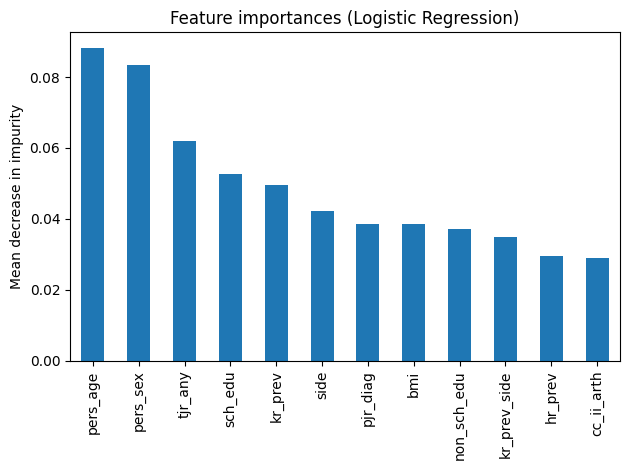

In [175]:
importances = []
for column in rt_weights.columns:
    importances.append(mean(rt_weights[column]))

importances = np.asarray(importances)

feature_scores = pd.Series(np.abs(importances), index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
feature_scores[0:12].plot.bar(ax=ax)
ax.set_title("Feature importances (Logistic Regression)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Случайный лес

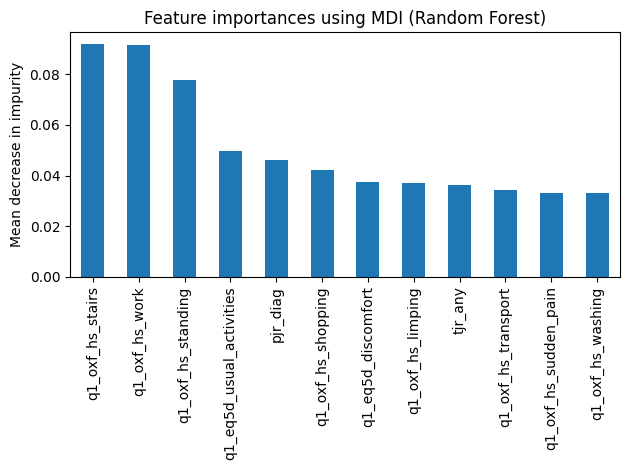

In [176]:
feature_names = X_train.columns

importances = []
for column in rt_weights.columns:
    importances.append(mean(rt_weights[column]))

forest_importances = pd.Series(importances)

feature_scores = pd.Series(xgbx.feature_importances_, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
feature_scores[:12].plot.bar(ax=ax)
ax.set_title("Feature importances using MDI (Random Forest)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### XGBX

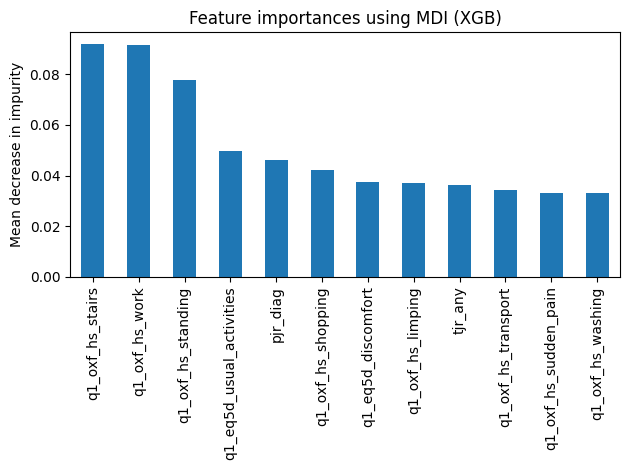

In [177]:
feature_names = X_train.columns

importances = []
for column in xgb_weights.columns:
    importances.append(mean(rt_weights[column]))

forest_importances = pd.Series(importances)

feature_scores = pd.Series(xgbx.feature_importances_, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
feature_scores[:12].plot.bar(ax=ax)
ax.set_title("Feature importances using MDI (XGB)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()